# Detecting sarcasm in news headlines with LSTM and CNN

### Downloading Dataset

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import wget
wget.download('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json')


 76% [........................................................                  ] 4341760 / 5643545

100% [..........................................................................] 5643545 / 5643545

'sarcasm.json'

In [2]:
#Setting Variables

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [4]:
# Preprocessing Data

with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [16]:
import numpy as np

In [17]:
training_sentences = np.array(sentences[0:training_size])
testing_sentences = np.array(sentences[training_size:])
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

In [6]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
#Creating Word Tokenizer

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [11]:
# Creating Sequences out of Tokens and Padding them

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


### Creating Simple LSTM NLP Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


Epoch 1/5
625/625 [==============================] - 21s 20ms/step - loss: 0.4550 - accuracy: 0.7712 - val_loss: 0.3856 - val_accuracy: 0.8246
Epoch 2/5
625/625 [==============================] - 12s 20ms/step - loss: 0.3521 - accuracy: 0.8382 - val_loss: 0.3718 - val_accuracy: 0.8322
Epoch 3/5
625/625 [==============================] - 12s 19ms/step - loss: 0.3282 - accuracy: 0.8535 - val_loss: 0.3654 - val_accuracy: 0.8317
Epoch 4/5
625/625 [==============================] - 12s 20ms/step - loss: 0.3143 - accuracy: 0.8614 - val_loss: 0.3699 - val_accuracy: 0.8316
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 0.3061 - accuracy: 0.8637 - val_loss: 0.3749 - val_accuracy: 0.8299


In [20]:
history.history


{'loss': [0.4550219178199768,
  0.35206615924835205,
  0.32819145917892456,
  0.3142871856689453,
  0.306062251329422],
 'accuracy': [0.7712000012397766,
  0.8382499814033508,
  0.8534500002861023,
  0.8614000082015991,
  0.8637499809265137],
 'val_loss': [0.3855555057525635,
  0.37183472514152527,
  0.36536359786987305,
  0.36987102031707764,
  0.37494367361068726],
 'val_accuracy': [0.8245640397071838,
  0.8321657180786133,
  0.8317185640335083,
  0.8315695524215698,
  0.8299299478530884]}

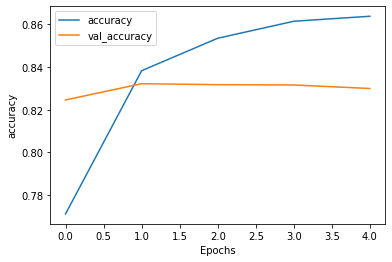

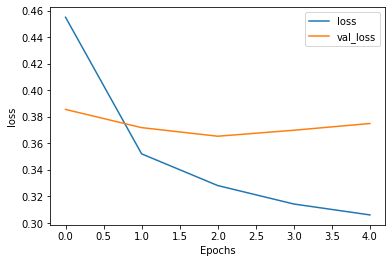

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [23]:
model.save("sarcasm_LSTM.h5")

## Replacing bidirectional LSTM layer with conv1d

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
__________________________________________________

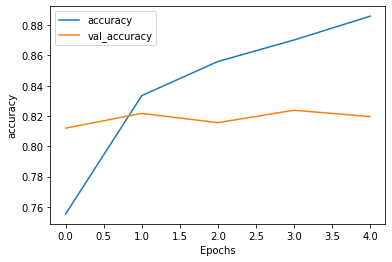

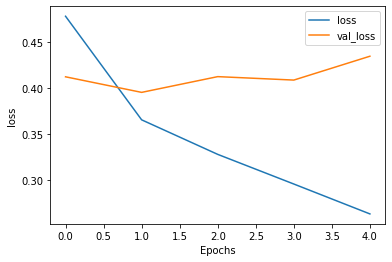

In [25]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [26]:
model.save("sarcasm_Conv1D.h5")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

### Using Conv1D is significantly faster than LSTM while still gives similar result.